##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

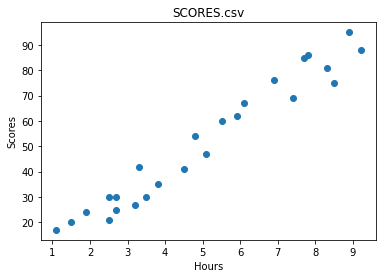

Intercept: [3.18084002]
Coef: [[9.47201212]]


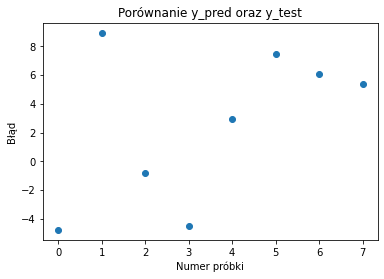

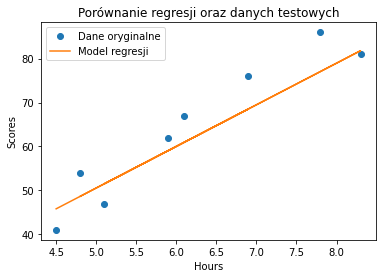

MAE: 5.102369396231447
MSE: 31.64773107621289
RMSE: 5.625631615757727


In [93]:
import numpy as np
import pandas as pd
import patsy as pa
from sklearn import model_selection as sl
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import math


def Linear_reg(names):
    df = pd.read_csv(names[0])
    data_array = df.to_numpy()
    plt.plot(data_array[:, 0], data_array[:, 1], "o")
    plt.xlabel(names[2])
    plt.ylabel(names[1])
    plt.title(names[0])
    plt.show()

    x = data_array[:, 0].reshape(-1,1)
    y = data_array[:, 1].reshape(-1,1)

    X_train, X_test, y_train, y_test = sl.train_test_split(x, y, test_size=0.30)

    reg = LinearRegression().fit(X_train, y_train)

    print(f'Intercept: {reg.intercept_}')
    print(f'Coef: {reg.coef_}')
    y_pred = reg.predict(X_test)

    plt.plot(y_test-y_pred,"o")
    plt.ylabel("Błąd")
    plt.xlabel("Numer próbki")
    plt.title("Porównanie y_pred oraz y_test")
    plt.show()

    plt.figure()
    plt.plot(X_test, y_test, "o", label="Dane oryginalne")
    plt.plot(X_test, y_pred, label="Model regresji")
    plt.xlabel(names[2])
    plt.ylabel(names[1])
    plt.legend()
    plt.title("Porównanie regresji oraz danych testowych")
    plt.show()
    
    MAE = abs(y_test - y_pred).mean()
    print(f'MAE: {MAE}')
    MSE = ((y_test - y_pred)**2).mean()
    print(f'MSE: {MSE}')
    RMSE = np.sqrt(MSE)
    print(f'RMSE: {RMSE}')
    
n = ["SCORES.csv", "Scores", "Hours"]

Linear_reg(n)

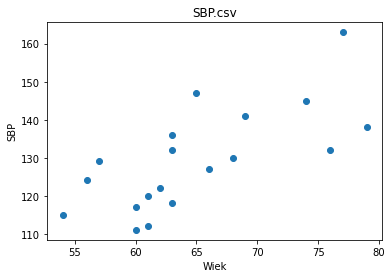

Intercept: [27.52722444]
Coef: [[1.57160248]]


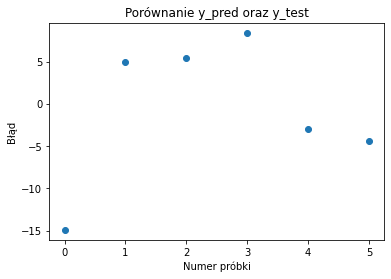

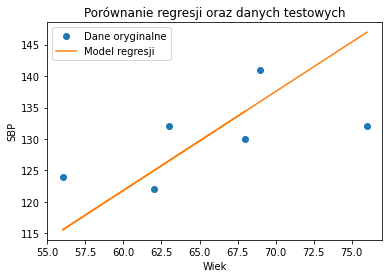

MAE: 6.881474103585657
MSE: 63.16266471748469
RMSE: 7.947494241425073


In [94]:
n2 = ["SBP.csv", "SBP", "Wiek"]
Linear_reg(n2)

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

   Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.0             3571                   1976   
1               9.0             4092                   1250   
2               9.0             3865                   1586   
3               7.5             4870                   2351   
4               8.0             4399                    431   

   Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
0                            0.525             541  
1                            0.572             524  
2                            0.580             561  
3                            0.529             414  
4                            0.544             410  


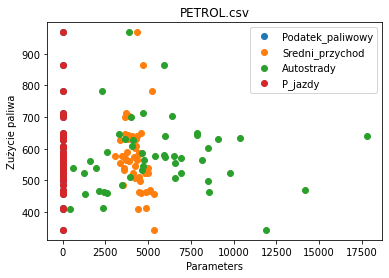

LogisticRegression()

In [105]:
from sklearn import preprocessing

df = pd.read_csv("PETROL.csv")
data_array = df.to_numpy()

y = data_array[:, 4]
x = data_array[:,0:4]

plt.plot(x, y, "o")
plt.xlabel("Parameters")
plt.ylabel("Zużycie paliwa")
plt.title("PETROL.csv")
plt.legend(["Podatek_paliwowy", "Sredni_przychod", "Autostrady", "P_jazdy"])
plt.show()

X_train, X_test, y_train, y_test = sl.train_test_split(x, y, test_size=0.30)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
reg = LogisticRegression().fit(X_scaled, y_train)
reg

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.